In [1]:
# Library
suppressPackageStartupMessages(library(tidyverse))
library(survival)

# Global
options(warn = -1)

# Scripts
source("Summarize.R")

# Data
load("DF.Rdata")
DF <- DF %>% 
  select(
    death:progression,
    follow_up,
    cd8foxp3_intratumoral:ki67_intratumoral_level
  )

glimpse(DF)

Observations: 285
Variables: 15
$ death                      <fct> DOC + DOD, DOC + DOD, DOC + DOD, DOC + DOD…
$ dod                        <fct> AND + AWD + DOC, AND + AWD + DOC, AND + AW…
$ progression                <fct> No tumor progression, No tumor progression…
$ follow_up                  <dbl> 21.33333, 21.33333, 21.33333, 21.33333, 94…
$ cd8foxp3_intratumoral      <fct> CD8 > FOXP3, CD8 > FOXP3, CD8 > FOXP3, CD8…
$ cd8foxp3_peritumoral       <fct> CD8 > FOXP3, CD8 > FOXP3, CD8 > FOXP3, CD8…
$ pdl1_tumor_level           <fct> Low PD-L1, Low PD-L1, Low PD-L1, Low PD-L1…
$ pdl1_intratumoral_level    <fct> High PD-L1, High PD-L1, High PD-L1, Low PD…
$ foxp3_intratumoral_level   <fct> Low FOXP3, Low FOXP3, High FOXP3, Low FOXP…
$ foxp3_peritumoral_level    <fct> High FOXP3, High FOXP3, High FOXP3, High F…
$ cd8_intratumoral_level     <fct> High CD8, High CD8, High CD8, High CD8, Lo…
$ cd8_peritumoral_level      <fct> High CD8, High CD8, High CD8, High CD8, Hi…
$ cd8ki67_intratumor

# Hazard ratios

In [2]:
# A function to estimate hazard ratios using Cox proportional hazards regression
HR_tbl <- function(data, time, event, covariate, str_marker, str_outcome) {
    # Creating the dataset
    time = enquo(time)
    event = enquo(event)
    covariate = enquo(covariate)
    df <- data %>% 
        select(
            time = !! time,
            event = !! event,
            covariate = !! covariate
        ) %>% 
        mutate(event = as.numeric(event))
    # Creating the model
    surv_obj <- survival::Surv(df$time, df$event)
    mdl <- coxph(surv_obj ~ covariate, data = df)
    tbl <- broom::tidy(mdl) %>% 
        mutate(
            hr = round(exp(estimate), 2),
            conf.low = round(exp(conf.low), 2),
            conf.high = round(exp(conf.high), 2),
            p.value = formatC(p.value, digits = 2, format = "g", flag = "#"),
            marker = paste(str_marker),
            outcome = paste(str_outcome)
        )  %>% 
        select(
            outcome, marker, hr, conf.low, conf.high, p.value
        )
    
    return(tbl)
}

## Tumor progression

In [3]:
str_outcome <- "Tumor progression"
tbl_1A <- DF %>% HR_tbl(
  follow_up, progression, pdl1_tumor_level,
  "PD-L1, tumor cells", str_outcome
)
tbl_1B <- DF %>% HR_tbl(
  follow_up, progression, pdl1_intratumoral_level,
  "PD-L1, intratumoral lymphocytes", str_outcome
)
tbl_1C <- DF %>% HR_tbl(
  follow_up, progression, foxp3_intratumoral_level,
  "FOXP3, intratumoral lymphocytes", str_outcome
)
tbl_1D <- DF %>% HR_tbl(
  follow_up, progression, foxp3_peritumoral_level,
  "FOXP3, peritumoral lymphocytes", str_outcome
)
tbl_1E <- DF %>% HR_tbl(
  follow_up, progression, cd8_intratumoral_level,
  "CD8, intratumoral lymphocytes", str_outcome
)
tbl_1F <- DF %>% HR_tbl(
  follow_up, progression, cd8_peritumoral_level,
  "CD8, peritumoral lymphocytes", str_outcome
)
tbl_1G <- DF %>% HR_tbl(
  follow_up, progression, cd8ki67_intratumoral_level,
  "CD8-Ki67, intratumoral lymphocytes", str_outcome
)
tbl_1H <- DF %>% HR_tbl(
  follow_up, progression, cd8ki67_peritumoral_level,
  "CD8-Ki67, peritumoral lymphocytes", str_outcome
)
tbl_1I <- DF %>% HR_tbl(
  follow_up, progression, ki67_intratumoral_level,
  "Ki67, intratumoral lymphocytes", str_outcome
)
tbl_1J <- DF %>% HR_tbl(
  follow_up, progression, cd8foxp3_intratumoral,
  "CD8/FOXP3, intratumoral lymphocytes", str_outcome
)
tbl_1K <- DF %>% HR_tbl(
  follow_up, progression, cd8foxp3_peritumoral,
  "CD8/FOXP3, peritumoral lymphocytes", str_outcome
)

#  tbl_1H excluded due to NAs
tbl_1 <- bind_rows(
  tbl_1A, tbl_1B,
  tbl_1C, tbl_1D,
  tbl_1E, tbl_1F,
  tbl_1G,
  tbl_1I,
  tbl_1J, tbl_1K
)  %>% 
    as.tibble()

print(tbl_1)

# A tibble: 10 x 6
   outcome         marker                          hr conf.low conf.high p.value
   <chr>           <chr>                        <dbl>    <dbl>     <dbl> <chr>  
 1 Tumor progress… PD-L1, tumor cells           1.09      0.5       2.36 0.83   
 2 Tumor progress… PD-L1, intratumoral lymphoc… 0.290     0.07      1.21 0.090  
 3 Tumor progress… FOXP3, intratumoral lymphoc… 1.14      0.61      2.11 0.69   
 4 Tumor progress… FOXP3, peritumoral lymphocy… 1.31      0.61      2.83 0.48   
 5 Tumor progress… CD8, intratumoral lymphocyt… 0.55      0.3       1.02 0.058  
 6 Tumor progress… CD8, peritumoral lymphocytes 0.56      0.3       1.06 0.074  
 7 Tumor progress… CD8-Ki67, intratumoral lymp… 5.7       2.95     11    2.2e-07
 8 Tumor progress… Ki67, intratumoral lymphocy… 2.15      1.19      3.89 0.011  
 9 Tumor progress… CD8/FOXP3, intratumoral lym… 0.49      0.26      0.93 0.029  
10 Tumor progress… CD8/FOXP3, peritumoral lymp… 0.4       0.22      0.74 0.0037 


## Overall mortality

In [4]:
str_outcome <- "Overall mortality"
tbl_2A <- DF %>% HR_tbl(
  follow_up, death, pdl1_tumor_level,
  "PD-L1, tumor cells", str_outcome
)
tbl_2B <- DF %>% HR_tbl(
  follow_up, death, pdl1_intratumoral_level,
  "PD-L1, intratumoral lymphocytes", str_outcome
)
tbl_2C <- DF %>% HR_tbl(
  follow_up, death, foxp3_intratumoral_level,
  "FOXP3, intratumoral lymphocytes", str_outcome
)
tbl_2D <- DF %>% HR_tbl(
  follow_up, death, foxp3_peritumoral_level,
  "FOXP3, peritumoral lymphocytes", str_outcome
)
tbl_2E <- DF %>% HR_tbl(
  follow_up, death, cd8_intratumoral_level,
  "CD8, intratumoral lymphocytes", str_outcome
)
tbl_2F <- DF %>% HR_tbl(
  follow_up, death, cd8_peritumoral_level,
  "CD8, peritumoral lymphocytes", str_outcome
)
tbl_2G <- DF %>% HR_tbl(
  follow_up, death, cd8ki67_intratumoral_level,
  "CD8-Ki67, intratumoral lymphocytes", str_outcome
)
tbl_2H <- DF %>% HR_tbl(
  follow_up, death, cd8ki67_peritumoral_level,
  "CD8-Ki67, peritumoral lymphocytes", str_outcome
)
tbl_2I <- DF %>% HR_tbl(
  follow_up, death, ki67_intratumoral_level,
  "Ki67, intratumoral lymphocytes", str_outcome
)
tbl_2J <- DF %>% HR_tbl(
  follow_up, death, cd8foxp3_intratumoral,
  "CD8/FOXP3, intratumoral lymphocytes", str_outcome
)
tbl_2K <- DF %>% HR_tbl(
  follow_up, death, cd8foxp3_peritumoral,
  "CD8/FOXP3, peritumoral lymphocytes", str_outcome
)

#  tbl_2H excluded due to NAs
tbl_2 <- bind_rows(
  tbl_2A, tbl_2B,
  tbl_2C, tbl_2D,
  tbl_2E, tbl_2F,
  tbl_2G,
  tbl_2I,
  tbl_2J, tbl_2K
)  %>% 
    as.tibble()

print(tbl_2)

# A tibble: 10 x 6
   outcome         marker                          hr conf.low conf.high p.value
   <chr>           <chr>                        <dbl>    <dbl>     <dbl> <chr>  
 1 Overall mortal… PD-L1, tumor cells            1.01    0.580      1.77 0.97   
 2 Overall mortal… PD-L1, intratumoral lymphoc…  0.94    0.47       1.87 0.86   
 3 Overall mortal… FOXP3, intratumoral lymphoc…  1       0.63       1.58 0.99   
 4 Overall mortal… FOXP3, peritumoral lymphocy…  1.66    0.97       2.82 0.062  
 5 Overall mortal… CD8, intratumoral lymphocyt…  0.79    0.52       1.21 0.28   
 6 Overall mortal… CD8, peritumoral lymphocytes  0.81    0.5        1.3  0.39   
 7 Overall mortal… CD8-Ki67, intratumoral lymp…  2.8     1.62       4.84 0.00023
 8 Overall mortal… Ki67, intratumoral lymphocy…  1.61    1.06       2.45 0.025  
 9 Overall mortal… CD8/FOXP3, intratumoral lym…  0.68    0.41       1.13 0.14   
10 Overall mortal… CD8/FOXP3, peritumoral lymp…  0.49    0.3        0.78 0.0031 


## Cancer-related mortality

In [5]:
str_outcome <- "Cancer-related mortality"
tbl_3A <- DF %>% HR_tbl(
  follow_up, dod, pdl1_tumor_level,
  "PD-L1, tumor cells", str_outcome
)
tbl_3B <- DF %>% HR_tbl(
  follow_up, dod, pdl1_intratumoral_level,
  "PD-L1, intratumoral lymphocytes", str_outcome
)
tbl_3C <- DF %>% HR_tbl(
  follow_up, dod, foxp3_intratumoral_level,
  "FOXP3, intratumoral lymphocytes", str_outcome
)
tbl_3D <- DF %>% HR_tbl(
  follow_up, dod, foxp3_peritumoral_level,
  "FOXP3, peritumoral lymphocytes", str_outcome
)
tbl_3E <- DF %>% HR_tbl(
  follow_up, dod, cd8_intratumoral_level,
  "CD8, intratumoral lymphocytes", str_outcome
)
tbl_3F <- DF %>% HR_tbl(
  follow_up, dod, cd8_peritumoral_level,
  "CD8, peritumoral lymphocytes", str_outcome
)
tbl_3G <- DF %>% HR_tbl(
  follow_up, dod, cd8ki67_intratumoral_level,
  "CD8-Ki67, intratumoral lymphocytes", str_outcome
)
tbl_3H <- DF %>% HR_tbl(
  follow_up, dod, cd8ki67_peritumoral_level,
  "CD8-Ki67, peritumoral lymphocytes", str_outcome
)
tbl_3I <- DF %>% HR_tbl(
  follow_up, dod, ki67_intratumoral_level,
  "Ki67, intratumoral lymphocytes", str_outcome
)
tbl_3J <- DF %>% HR_tbl(
  follow_up, dod, cd8foxp3_intratumoral,
  "CD8/FOXP3, intratumoral lymphocytes", str_outcome
)
tbl_3K <- DF %>% HR_tbl(
  follow_up, dod, cd8foxp3_peritumoral,
  "CD8/FOXP3, peritumoral lymphocytes", str_outcome
)

#  tbl_3H excluded due to NAs
tbl_3 <- bind_rows(
  tbl_3A, tbl_3B,
  tbl_3C, tbl_3D,
  tbl_3E, tbl_3F,
  tbl_3G,
  tbl_3I,
  tbl_3J, tbl_3K
)  %>% 
    as.tibble()

print(tbl_3)

# A tibble: 10 x 6
   outcome             marker                      hr conf.low conf.high p.value
   <chr>               <chr>                    <dbl>    <dbl>     <dbl> <chr>  
 1 Cancer-related mor… PD-L1, tumor cells        1.21     0.53      2.76 0.64   
 2 Cancer-related mor… PD-L1, intratumoral lym…  0.62     0.18      2.07 0.43   
 3 Cancer-related mor… FOXP3, intratumoral lym…  0.88     0.43      1.82 0.73   
 4 Cancer-related mor… FOXP3, peritumoral lymp…  1.52     0.67      3.46 0.32   
 5 Cancer-related mor… CD8, intratumoral lymph…  0.72     0.38      1.38 0.32   
 6 Cancer-related mor… CD8, peritumoral lympho…  0.4      0.18      0.86 0.019  
 7 Cancer-related mor… CD8-Ki67, intratumoral …  3.7      1.73      7.92 0.00073
 8 Cancer-related mor… Ki67, intratumoral lymp…  2.58     1.33      5.03 0.0051 
 9 Cancer-related mor… CD8/FOXP3, intratumoral…  0.6      0.28      1.27 0.18   
10 Cancer-related mor… CD8/FOXP3, peritumoral …  0.2      0.09      0.44 6.1e-05


## All outcomes

**Forest plots of biomarkers by outcome.** Hazards ratios (dots) with 95% confidence intervals (error bars) for tumor progression, overall mortality and cancer-related mortality by expression levels of PD-L1, FOXP3, CD8, CD8-Ki67 and CD8/FOXP3 (high level vs low level). The dashed line corresponds to a hazard ratio of 1. Hazards ratios (HR) with their 95% confidence intervals (minimum, maximum) and P values were estimated using Cox's proportional hazards regression models.

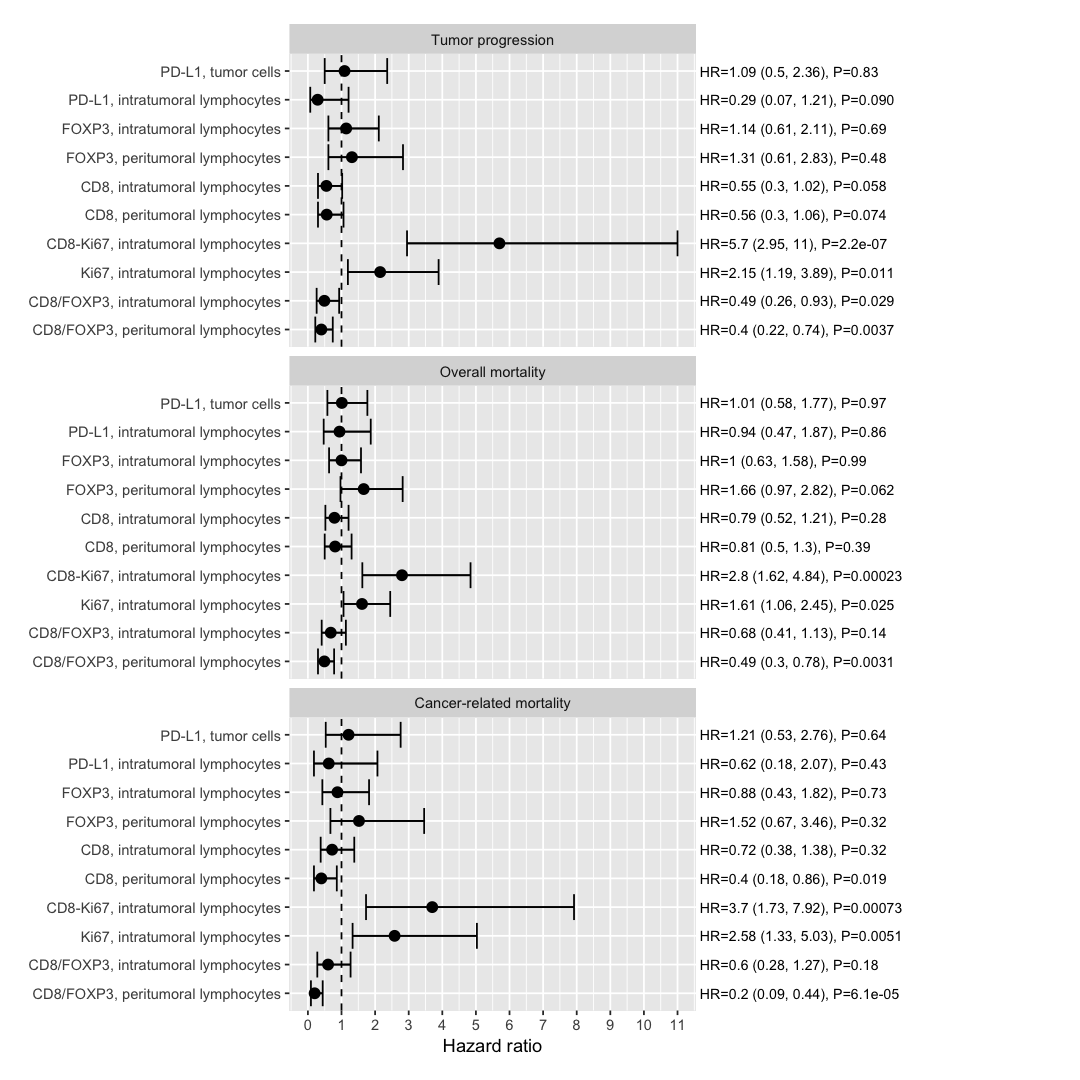

In [6]:
options(repr.plot.height = 9, repr.plot.width = 9)

tbl_HR <- bind_rows(tbl_1, tbl_2, tbl_3)

Plot_HR <- tbl_HR  %>% 
  mutate(
    outcome = factor(
      outcome,
      levels = c("Tumor progression", "Overall mortality", "Cancer-related mortality")
    ),
    marker = fct_rev(
      factor(marker,
        levels = c(
          "PD-L1, tumor cells",
          "PD-L1, intratumoral lymphocytes",
          "FOXP3, intratumoral lymphocytes",
          "FOXP3, peritumoral lymphocytes",
          "CD8, intratumoral lymphocytes",
          "CD8, peritumoral lymphocytes",
          "CD8-Ki67, intratumoral lymphocytes",
          "Ki67, intratumoral lymphocytes",
          "CD8/FOXP3, intratumoral lymphocytes",
          "CD8/FOXP3, peritumoral lymphocytes"
      )))
    ) %>% 
    ggplot(aes(x = marker, y = hr, ymin = conf.low, ymax = conf.high)) +
      geom_pointrange() +
      geom_errorbar(aes(ymin = conf.low, ymax = conf.high)) +
      geom_hline(yintercept = 1, linetype = 2) +
      labs(x = NULL, y = "Hazard ratio") +
      scale_y_continuous(limits = c(0, 11), breaks = c(0:11)) +
      coord_flip(clip = "off") +
      facet_wrap(~ outcome, ncol = 1) +
      geom_text(
        aes(
          label = paste0(" HR=", hr, " (", conf.low, ", ", conf.high, "), P=", p.value),
            y = Inf,
            x = marker
          ), hjust = 0, size = 3
      ) +
      theme(plot.margin = unit(c(1,16,1,1), "lines"))

Plot_HR

In [7]:
ggsave(
    filename = "Figs/PFCK-papRCC-HR.png",
    Plot_HR,
    width = 9,
    height = 9,
    units = "in"
)